In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers



In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
Image_size=256
Batch_size=32
Channels=3
Epochs=15
n_classes=3

In [ ]:

dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/gdrive/MyDrive/rice leaf diseases dataset",
    shuffle=True,
    batch_size=Batch_size,
    image_size=(Image_size,Image_size)
    )

Found 4684 files belonging to 3 classes.


In [ ]:
len(dataset)

147

In [ ]:
class_names=dataset.class_names
class_names

['Bacterialblight', 'Brownspot', 'Leafsmut']

In [ ]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())


(32, 256, 256, 3)
[1 1 0 1 1 2 0 1 2 1 2 0 2 1 1 2 2 2 2 1 1 2 2 0 0 1 2 2 2 1 0 1]


3 represent the RGB channels while the 256 reprent the image size while the 32- is the batch size

In [ ]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[141.74957  150.74957  147.74957 ]
  [139.52869  148.52869  145.52869 ]
  [138.2088   147.2088   144.2088  ]
  ...
  [ 72.08594  102.08594   76.08594 ]
  [ 70.60156  102.828125  76.08594 ]
  [ 70.08594  103.08594   76.08594 ]]

 [[140.93622  149.93622  146.93622 ]
  [140.32428  149.32428  146.32428 ]
  [141.05609  150.05609  147.05609 ]
  ...
  [ 73.       103.        77.      ]
  [ 71.898315 103.55084   77.      ]
  [ 71.515625 103.74219   77.      ]]

 [[141.42969  150.42969  147.42969 ]
  [141.6875   150.6875   147.6875  ]
  [143.10443  152.10443  149.10443 ]
  ...
  [ 72.754944 102.38568   76.57031 ]
  [ 72.57031  102.57031   76.57031 ]
  [ 72.57031  102.57031   76.57031 ]]

 ...

 [[102.57031  110.57031   63.570312]
  [102.57031  110.57031   63.570312]
  [102.57031  110.32526   64.060425]
  ...
  [111.92395  102.16901   77.16901 ]
  [117.72015  107.20593   82.51843 ]
  [120.0639   111.144165  85.800415]]

 [[110.421875 119.16406   73.64844 ]
  [110.61322  119.35541   

In [ ]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0].shape)

(256, 256, 3)


# visualization

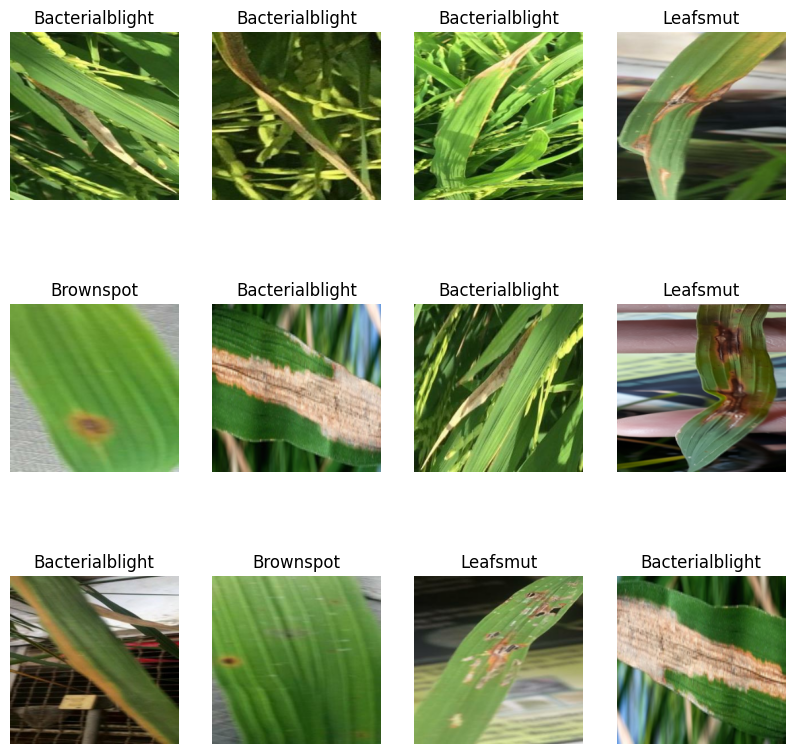

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
      ax=plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.title(class_names[label_batch[i]])
      plt.axis('off')

In [ ]:
#plt.figure(figsize=(10,10))
#for image_batch,label_batch in dataset.take(2):
    #for i in range(12):
      #ax=plt.subplot(3,4,i+1)
      #plt.imshow(image_batch[i].numpy().astype('uint8'))
      #plt.title(class_names[label_batch[i]])
      #plt.axis('off')

In [ ]:
len(dataset)

147

# splitting the dataset

80% ==> training
20% ==> validation,10%test

In [ ]:
train_size=0.8
len(dataset)*train_size

117.60000000000001

In [ ]:
train_ds=dataset.take(117)
len(train_ds)

117

In [ ]:
test_ds=dataset.skip(117)
len(test_ds)

30

In [ ]:
val_size=0.1
len(dataset)*val_size

14.700000000000001

In [ ]:
val_ds=test_ds.take(14)
len(val_ds)

14

In [ ]:
test_ds=test_ds.skip(14)
len(test_ds)

16

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)
  if shuffle:
    ds=ds.shuffle(shuffle_size,seed=12)

  train_size=int(train_split*ds_size)
  val_size=int(val_split*ds_size)

  train_ds=ds.take(train_size)

  val_ds=ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds


In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

117

In [ ]:
len(test_ds)

In [ ]:
len(val_ds)

14

In [ ]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# preprocessing

In [ ]:
Image_size = 256
Channels = 3
n_classes = 3

In [ ]:
#resize_and_rescale=tf.keras.Sequential([
    #layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    #layers.experimental.preprocesssing.Rescaling(1.0/255)
#])

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_size, Image_size),
    layers.Rescaling(1.0 / 255)
])

In [ ]:
#tf.keras.Sequential([
    #layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    #layers.experimental.preprocessing.RandomRotation(0.2),
#])

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

# Building the Model#
- using CNN that is convolutional neural network.
- it has threes layers that is :
    - convolutional layers
    - pooling layers

In [ ]:
model = models.Sequential([
    layers.Input(shape=(Image_size, Image_size, Channels)),
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

- the trainable params are the  parameters that the model will learn during training,including weights and biases in the convolutional and dense layers.
- Non_ Trainable parameters ..since there are no frozen layers or layers with fixed weights ,there are no non_trainable parameters


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history=model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=Batch_size,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 1074s 6s/step - accuracy: 0.4844 - loss: 0.9683 - val_accuracy: 0.7076 - val_loss: 0.7296
Epoch 2/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 670s 6s/step - accuracy: 0.7227 - loss: 0.6374 - val_accuracy: 0.7902 - val_loss: 0.5035
Epoch 3/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 721s 6s/step - accuracy: 0.8168 - loss: 0.4488 - val_accuracy: 0.8326 - val_loss: 0.4424
Epoch 4/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 680s 6s/step - accuracy: 0.8177 - loss: 0.4311 - val_accuracy: 0.8638 - val_loss: 0.3200
Epoch 5/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 683s 6s/step - accuracy: 0.8681 - loss: 0.3235 - val_accuracy: 0.9018 - val_loss: 0.2713
Epoch 6/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 697s 6s/step - accuracy: 0.8882 - loss: 0.2724 - val_accuracy: 0.9174 - val_loss: 0.1784
Epoch 7/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 700s 5s/step - accuracy: 0.9348 - loss: 0.1649 - val_accuracy: 0.9603 - val_loss: 0.1293
Epoch 8/15
117/117 ━━━━━━━━━━━━━━━━━━━━ 676s 5s/step - accuracy: 0.9478 - loss: 0.1424 - val_acc

In [ ]:
#model.fit(
#train_ds,
#epochs=Epochs(30)
#batch_size=Batch_size,
#verbose=1,
#validation_data=val_ds
#)

In [ ]:
scores=model.evaluate(test_ds)

16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9450 - loss: 0.1508


In [ ]:
scores

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 117}

In [ ]:
print(history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
accuracy=history.history['accuracy']
accuracy

[0.595327615737915,
 0.7537593841552734,
 0.8066595196723938,
 0.8388829231262207,
 0.8731303215026855,
 0.9006444811820984,
 0.9366272687911987,
 0.9462943077087402,
 0.951127827167511,
 0.9562298655509949,
 0.9834401607513428,
 0.9591836929321289,
 0.9803974032402039,
 0.9898504018783569,
 0.9543501734733582]

In [ ]:
len(history.history['accuracy'])

15

In [ ]:
val_accuracy=history.history['val_accuracy']


In [ ]:
loss = history.history['loss']


In [ ]:
val_loss = history.history['val_loss']

# plotting the accuracy scores of training and accuracy scores

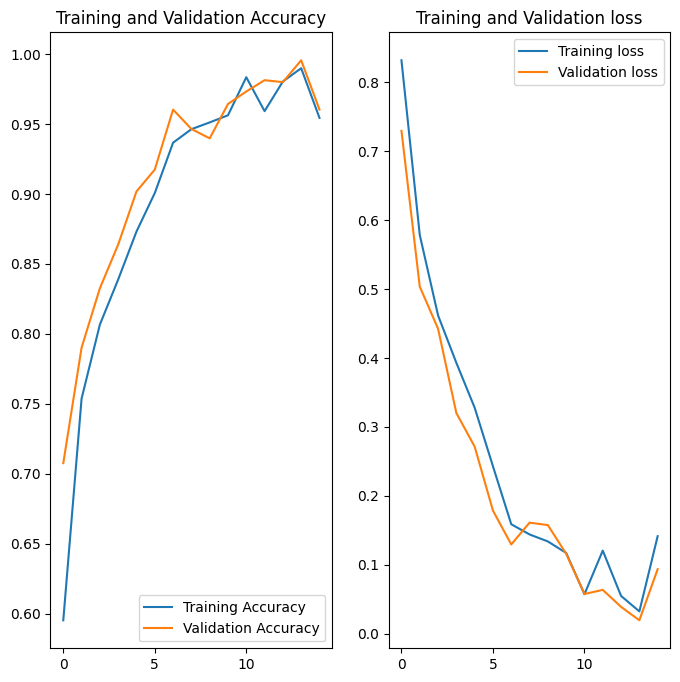

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs),accuracy,label='Training Accuracy')
plt.plot(range(Epochs),val_accuracy,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(Epochs),loss,label='Training loss')
plt.plot(range(Epochs),val_loss,label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')
plt.show()

# FIRST GRAPH
- x-axis indicates the number of epochs
- y-axis indicates the accuracy
- both the training and the validation accuracy increases as the numper of epochs increases.
- intially the model improves rapidly in both the varidation and training acuuracy that suggest the model is learning well.
- towards the last epochs  the line starts to converge that implies that the model is performing similar on both accuracy.
- there is also a slight dip on the final epoch that tries to indicate overfitting that implies the performance of the model is slightly worse on the unseen data (validation data) compared to the training data.

# SECOND GRAPH
- the training and validation loss both decreases as the training progresses showing that the model is improving by reducing the performance error.

- intially the loss drops quickly showing the model is learning effectively during the early epochs.

- validation loss continues to decreases ,but in the later epochs ,there's a slight increases in the validation loss,while the training loss continues to decrease. this suggest overfitting showing that the model is fitting the training data very well but not generalizing as well to the valo]idation data.


As the number of epochs increases the accuracy  also increases towards 100%,while the loss in validation test decreases as the epochs increases showing that the model is predicting both clases correctly

# Making predictions

In [ ]:
for image_batch,label_batch in dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[ 69.09332   85.09332   84.09332 ]
  [ 73.43878   89.43878   88.43878 ]
  [ 79.5838    95.5838    94.5838  ]
  ...
  [ 24.521301  41.5213    22.521301]
  [ 23.80597   40.80597   21.80597 ]
  [ 23.49176   40.49176   21.49176 ]]

 [[ 67.34375   83.34375   81.828125]
  [ 72.28906   88.28906   86.77344 ]
  [ 78.14844   94.14844   92.63281 ]
  ...
  [ 19.6875    36.6875    17.945312]
  [ 19.066467  36.066467  17.32428 ]
  [ 18.321594  35.321594  16.579407]]

 [[ 67.77344   84.203125  79.91406 ]
  [ 72.71875   89.14844   84.859375]
  [ 78.578125  95.00781   90.71875 ]
  ...
  [ 21.104431  38.10443   20.104431]
  [ 20.117188  37.117188  19.117188]
  [ 19.466614  36.466614  18.466614]]

 ...

 [[206.70026  220.63208  166.55396 ]
  [201.27264  216.89124  162.45093 ]
  [194.79529  208.50623  156.02393 ]
  ...
  [108.939575 145.38568   67.10443 ]
  [108.57031  145.57031   66.42969 ]
  [108.57031  146.09161   64.60156 ]]

 [[220.91534  238.33594  177.53906 ]
  [214.03113  232.93341  1

In [ ]:
for image_batch,label_batch in test_ds.take(1):
  print(image_batch[0].numpy())

In [ ]:
import numpy as np


First image to predict


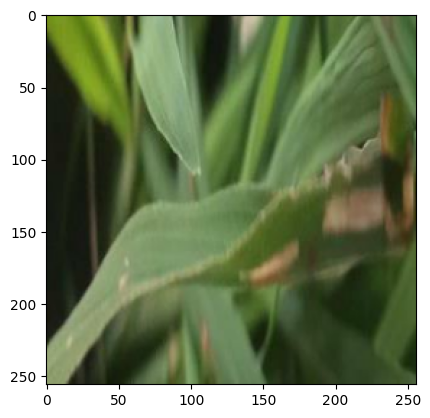

Actual label: Leafsmut
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted probabilities: [2.7127180e-04 1.5710911e-04 9.9957162e-01]
Predicted label: Leafsmut


In [ ]:
for image_batch,label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()

    print('First image to predict')
    plt.imshow(first_image)
    plt.show()
    print('Actual label:', class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print('Predicted probabilities:', batch_prediction[0])
    predicted_label = class_names[np.argmax(batch_prediction[0])]
    print(f'Predicted label: {predicted_label}')


First image to predict
actual label Leafsmut
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[0.1507519  0.00087179 0.8483764 ]
predicted label Leafsmut


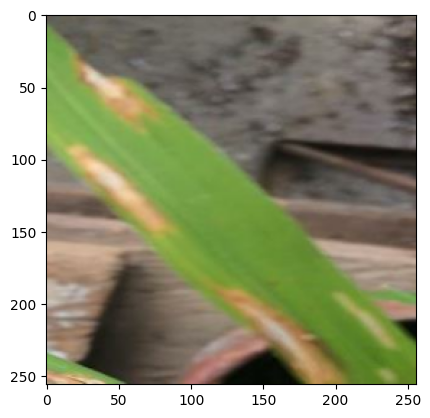

In [ ]:
for image_batch,label_batch in test_ds.take(1):

  first_image=image_batch[0].numpy().astype('uint8')
  first_label=label_batch[0].numpy()

  print('First image to predict')
  plt.imshow(first_image)
  print('actual label',class_names[first_label])

  batch_prediction=model.predict(image_batch)
  print((batch_prediction[0]))
  print(f'predicted label',class_names[np.argmax(batch_prediction[0])])


In [ ]:
import numpy as np

In [ ]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


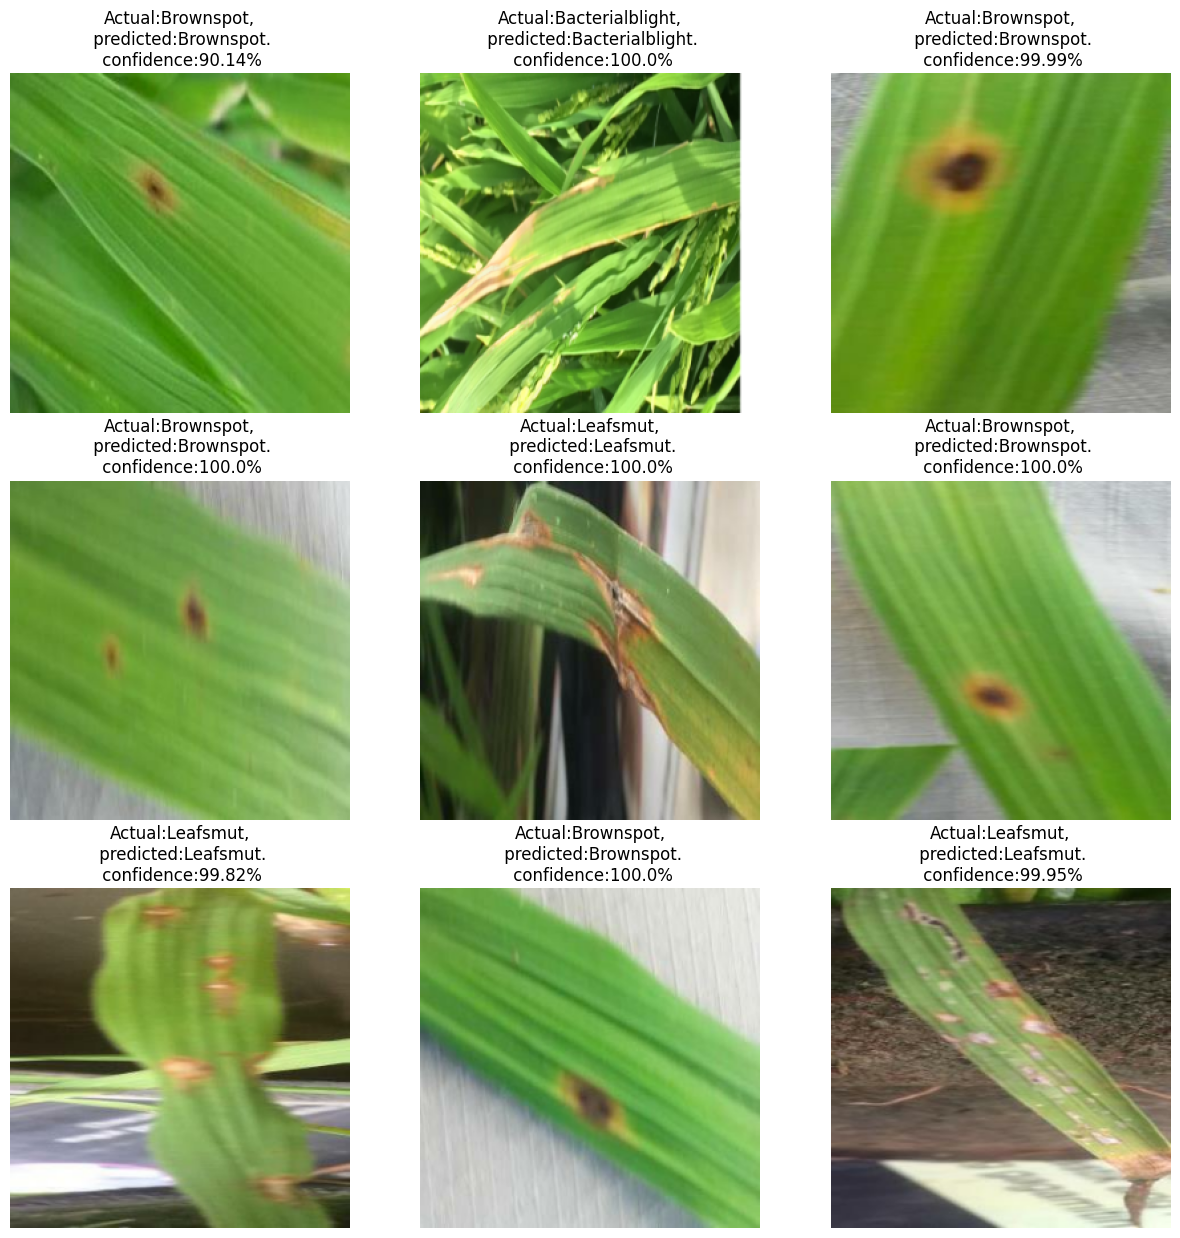

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]
    plt.title(f"Actual:{actual_class},\n predicted:{predicted_class}.\n confidence:{confidence}%")
    plt.axis('off')

In [ ]:
model_version=1
model.save(f'../models/{models_version}')